In [24]:
import pandas as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = np.read_csv("./test.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
# حذف ستون های Unnamed و id

df = df.drop(columns=['Unnamed: 0', 'id'])
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
# بررسی ستون های categorical
df.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [5]:
# تبدیل ستون های categorical به عدد

# Target
df['satisfaction'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

# Binary categorical
df['Gender'] = df['Gender'].map({
    'Male': 1,
    'Female': 0
})

df['Customer Type'] = df['Customer Type'].map({
    'Loyal Customer': 1,
    'disloyal Customer': 0
})

df['Type of Travel'] = df['Type of Travel'].map({
    'Business travel': 1,
    'Personal Travel': 0
})

# Ordinal categorical
df['Class'] = df['Class'].map({
    'Business': 2,
    'Eco Plus': 1,
    'Eco': 0
})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Class                              25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [ ]:
# رفع مشکل missing value
# از Median استفاده کردم تا تاثیر outliers ها حداقل بشه

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(
    df['Arrival Delay in Minutes'].median()
)

In [10]:
df['Arrival Delay in Minutes'].describe()

count    25976.000000
mean        14.693756
std         37.466787
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1115.000000
Name: Arrival Delay in Minutes, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Class                              25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [14]:
df['satisfaction'].value_counts()
df['satisfaction'].value_counts(normalize=True)

satisfaction
0    0.561018
1    0.438982
Name: proportion, dtype: float64

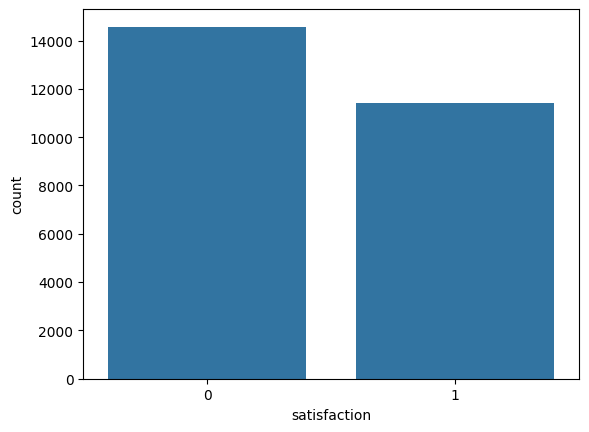

In [18]:
sns.countplot(x='satisfaction', data=df)
plt.show()

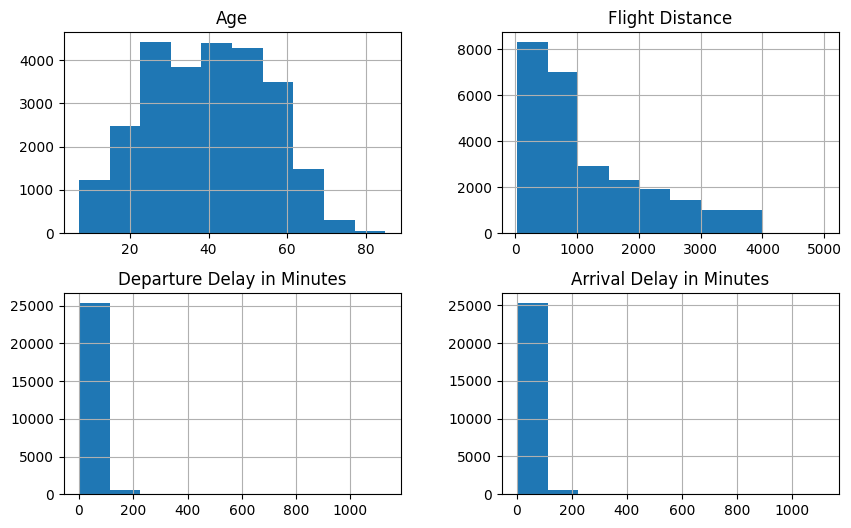

In [19]:
df[['Age','Flight Distance','Departure Delay in Minutes',
    'Arrival Delay in Minutes']].hist(figsize=(10,6))
plt.show()

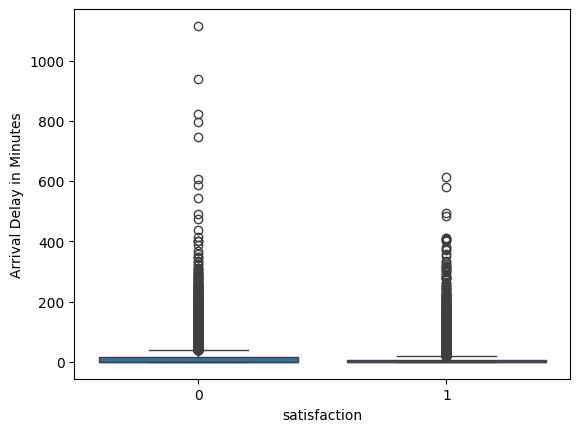

In [20]:
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df)
plt.show()

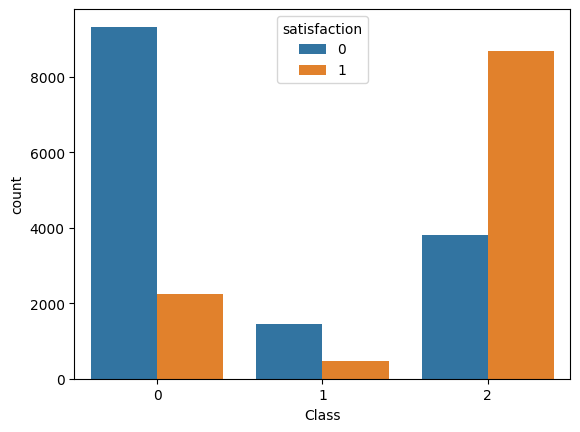

In [21]:
sns.countplot(x='Class', hue='satisfaction', data=df)
plt.show()


In [26]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000,25976.000000
mean,0.492917,0.815253,39.620958,0.694410,1.035841,1193.788459,2.724746,3.046812,2.756775,2.977094,...,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.693756,0.438982
std,0.499959,0.388100,15.135685,0.460666,0.961744,998.683999,1.335384,1.533371,1.412951,1.282133,...,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.466787,0.496272
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,0.000000
50%,0.000000,1.000000,40.000000,1.000000,1.000000,849.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,2.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000,1.000000


In [ ]:
X_scaled

array([[-0.98593202,  0.47603968,  0.81788702, ...,  1.29899809,
         0.95381034,  0.78220768],
       [-0.98593202,  0.47603968, -0.23923776, ...,  1.29899809,
        -0.38228641, -0.39218839],
       [ 1.01426871, -2.10066521, -1.29636255, ..., -0.974927  ,
        -0.38228641, -0.39218839],
       ...,
       [-0.98593202,  0.47603968, -1.49457344, ..., -0.974927  ,
        -0.38228641, -0.39218839],
       [ 1.01426871,  0.47603968, -1.69278434, ...,  0.54102306,
        -0.38228641, -0.39218839],
       [-0.98593202,  0.47603968,  0.15718403, ..., -1.73290203,
        -0.38228641, -0.39218839]], shape=(25976, 22))